In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("./data/tweets_features.csv", encoding='latin')
df.drop(['is_after_certain_day'], axis=1, inplace=True)

<Axes: >

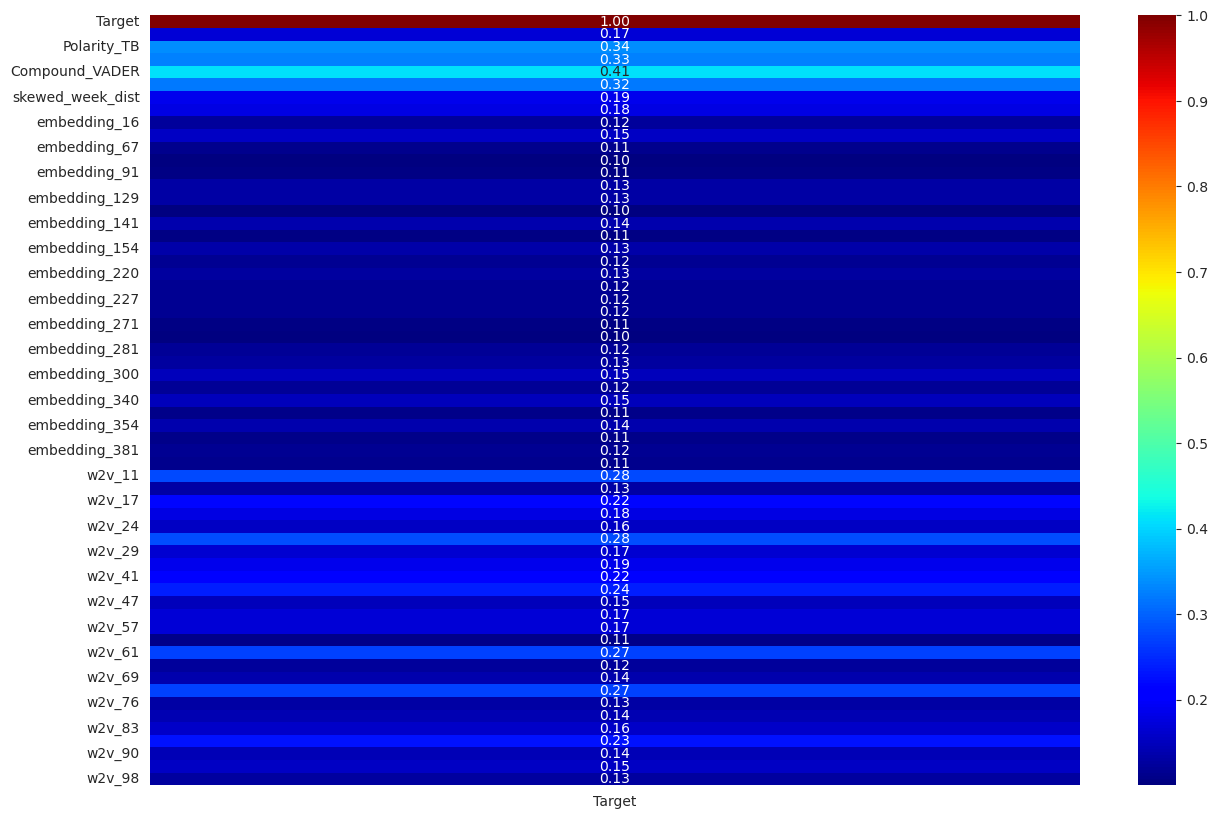

In [13]:
import seaborn as sns

corr = df.select_dtypes(include=['number']).corr()

corr_filtered = corr[corr["Target"] > 0.1]

plt.figure(figsize=(15, 10))
sns.heatmap(corr_filtered[["Target"]], annot=True, fmt=".2f", cmap='jet', cbar=True, square=False)

In [14]:
from sklearn.preprocessing import StandardScaler

X = df.select_dtypes(include=['number'])
X = X.drop(['Target'], axis=1)
y = df['Target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from feature_engine.selection import SelectBySingleFeaturePerformance

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_scaled, y)
feature_importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_importances = feature_importances[feature_importances > 0.003]
feature_importances["Target"] = 1

In [16]:
feature_importances.index

Index(['Negative_VADER', 'skewed_hour_dist', 'Weekday', 'Compound_VADER',
       'skewed_week_dist', 'w2v_11', 'Mentions', 'Polarity_TB', 'w2v_27',
       'w2v_53', 'Hour', 'w2v_44', 'w2v_84', 'embedding_16', 'Target'],
      dtype='object')

<Axes: >

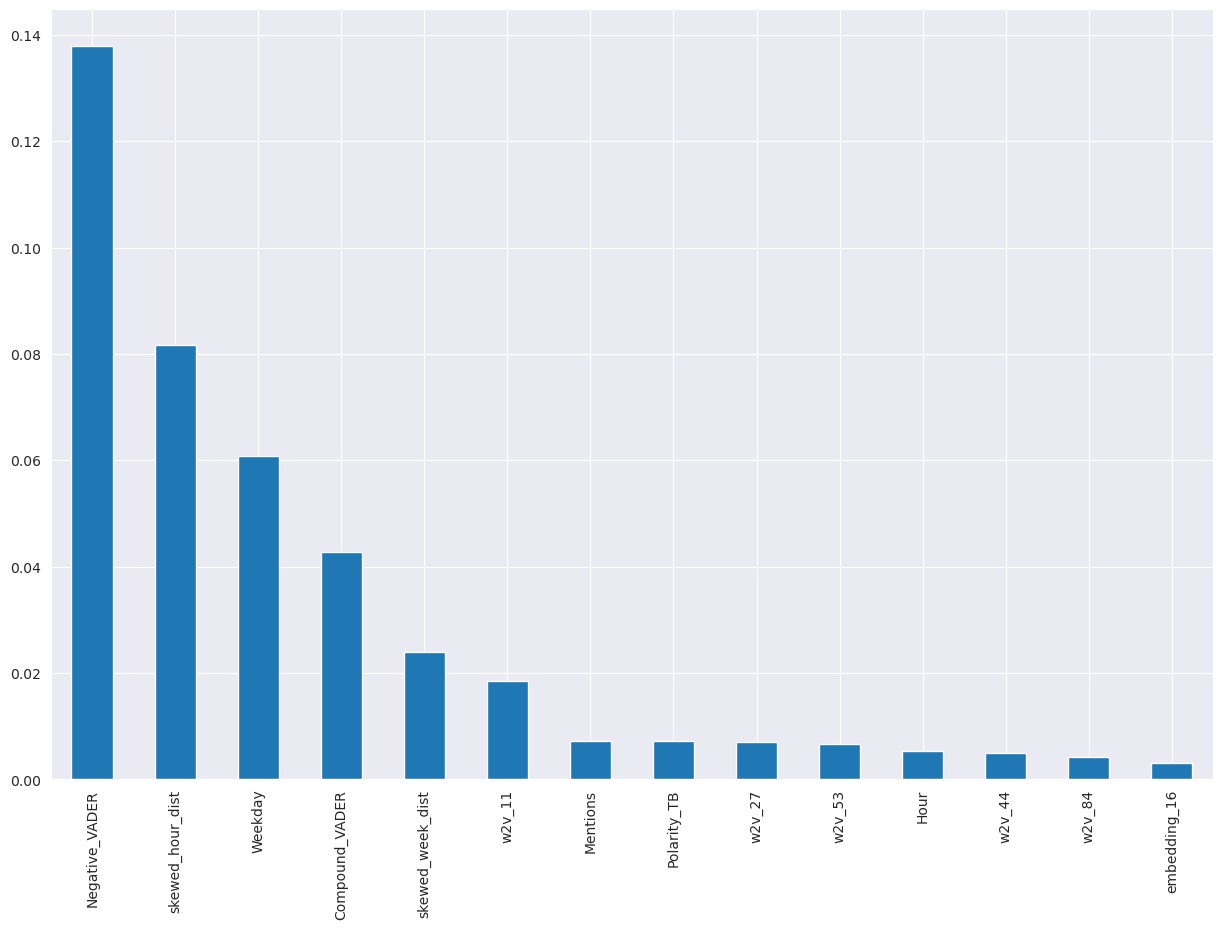

In [17]:
feature_importances.drop(["Target"]).plot(kind='bar', figsize=(15, 10))

In [18]:
df_filtered = df.loc[:, feature_importances.index]
X = df_filtered.drop(['Target'], axis=1)
y = df_filtered['Target']

In [19]:
prf = SelectBySingleFeaturePerformance(
    estimator=RandomForestClassifier(random_state=2115),
    scoring='roc_auc',
    cv=3,
    threshold=0.7,
)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train_t = prf.fit_transform(X_scaled, y)

KeyboardInterrupt: 

In [ ]:
feature_names = X.columns
selected_mask = prf.get_support()
selected_features = feature_names[selected_mask]
print("Selected features:", selected_features)

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression(C=0.001, class_weight='balanced', penalty='l1', solver='liblinear', random_state=2115)

log_clf.fit(X_scaled, y)

model = SelectFromModel(log_clf, prefit=True)
X_train_t = model.transform(X_scaled)
X_train_t.shape

In [ ]:
feature_names = X.columns
selected_mask = model.get_support()
selected_features = feature_names[selected_mask]
print("Selected features:", selected_features)

In [ ]:
#Select by single feature performace
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from feature_engine.selection import SelectBySingleFeaturePerformance

eks=df
uaj=df['Target']
sel = SelectBySingleFeaturePerformance(
        estimator=LinearRegression(), scoring="r2", cv=3, threshold=0.01)
sel.fit(eks,uaj)
len(sel.features_to_drop_)
Xt=sel.transform(eks)

In [ ]:
#Partial Component Analysis
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

non_numeric_columns=df.select_dtypes(exclude=['int64', 'float64']).columns
df_pcaT=df.drop(columns=non_numeric_columns)
df_pca=df_pcaT.drop(columns='Target')
scaled_pca=preprocessing.scale(df_pca)
pca=PCA()
pca.fit(scaled_pca)
pca.transform(scaled_pca)
per_var=np.round(pca.explained_variance_ratio_*100, decimals=1)
x = sum(per_var[0:100])
labels=[x for x in range(1,21)]
plt.bar(x=range(1,21), height=per_var[0:20], tick_label=labels)
plt.show()
#Only about 18% of variance sits in PC1, percentages of the rest are rather small but not negligible

In [ ]:
x